params:
Q = 5.0
f_res = 5000
BW = 1000
(1, 6)


/tmp/ipykernel_7807/4118841694.py:24: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20*np.log10(np.abs(h)))


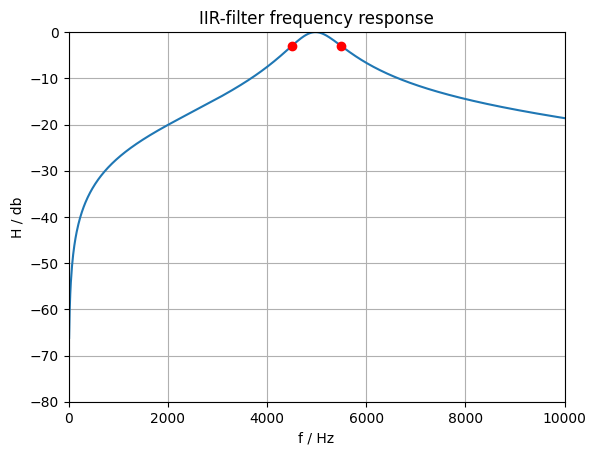

(85,)


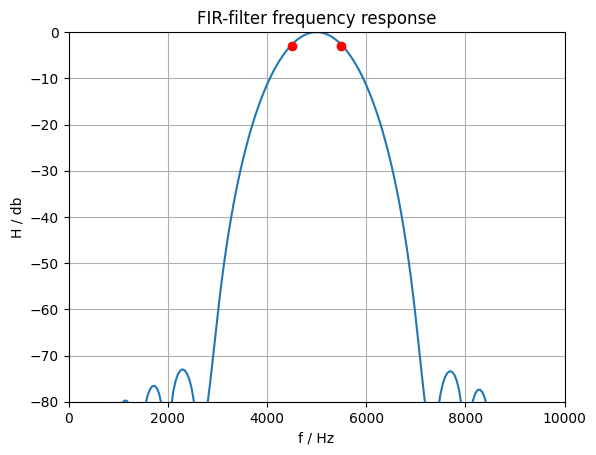

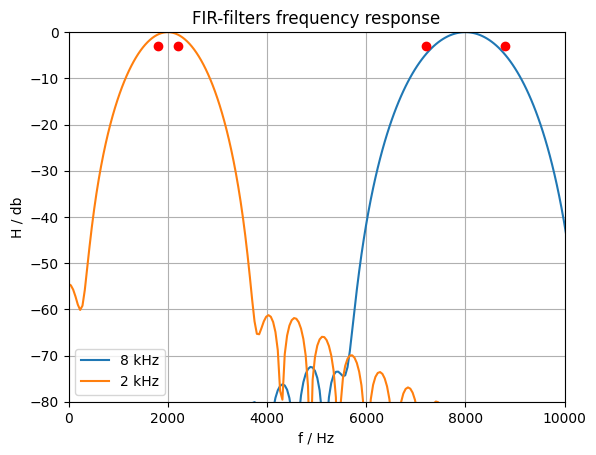

/tmp/ipykernel_7807/4118841694.py:111: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w_8000, 20*np.log10(np.abs(h_8000)), label="8 kHz")
/tmp/ipykernel_7807/4118841694.py:112: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w_2000, 20*np.log10(np.abs(h_2000)), label="2 kHz")


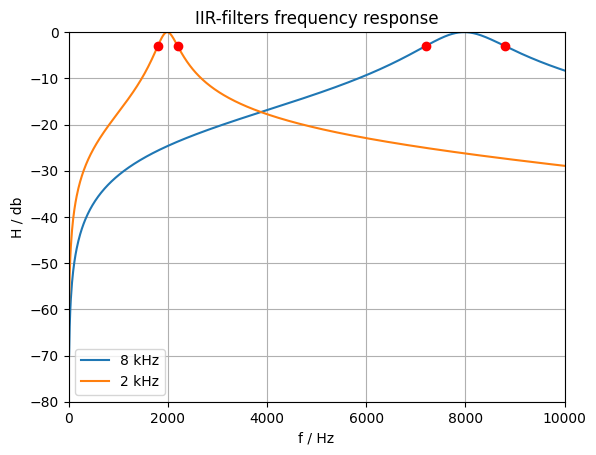

In [13]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np

def freqz(b, a, BW, f_res, f_s, title=""):
    w, h = signal.freqz(b, a, fs=f_s)

    plt.title(title)
    plt.plot(w, 20*np.log10(np.abs(h)))
    plt.plot(f_res - BW/2, -3, 'ro')
    plt.plot(f_res + BW/2, -3, 'ro')
    #plt.xscale('log')
    plt.xlabel("f / Hz")
    plt.ylabel("H / db")
    plt.xlim(0, 10000)
    plt.ylim(-80, 0)
    plt.grid()
    plt.show()

def sosfreqz(sos, BW, f_res, f_s, title=""):
    w, h = signal.sosfreqz(sos, 2048, fs=f_s)

    plt.title(title)
    plt.plot(w, 20*np.log10(np.abs(h)))
    plt.plot(f_res - BW/2, -3, 'ro')
    plt.plot(f_res + BW/2, -3, 'ro')
    #plt.xscale('log')
    plt.xlabel("f / Hz")
    plt.ylabel("H / db")
    plt.xlim(0, 10000)
    plt.ylim(-80, 0)
    plt.grid()
    plt.show()


f_s = 48000
num_coeffs = 6
BW = 1000
f_res = 5000
Q = f_res / BW

f_low = f_res - BW/2
f_high = f_res + BW/2

print("params:")
print("Q =", Q)
print("f_res =", f_res)
print("BW =", BW)

sos = signal.iirfilter(num_coeffs/6, [f_low, f_high], ftype="bessel", fs=f_s, output='sos')
print(sos.shape)
sosfreqz(sos, BW, f_res, f_s, "IIR-filter frequency response")

b = signal.firwin(num_coeffs * 14 + 1, [f_low, f_high], fs=f_s, pass_zero='bandpass', window="blackman")
print(b.shape)
freqz(b, [1], BW, f_res, f_s, "FIR-filter frequency response")

## compare different fir filters

f_8000 = 8000
BW_8000 = f_8000/Q
f_low_8000 = f_8000 - BW_8000/2
f_high_8000 = f_8000 + BW_8000/2
b_8000 = signal.firwin(num_coeffs * 14 + 1, [f_low_8000, f_high_8000], fs=f_s, pass_zero='bandpass', window="blackman")

f_2000 = 2000
BW_2000 = f_2000/Q
f_low_2000 = f_2000 - BW_2000/2
f_high_2000 = f_2000 + BW_2000/2
b_2000 = signal.firwin(num_coeffs * 14 + 1, [f_low_2000, f_high_2000], fs=f_s, pass_zero='bandpass', window="blackman")

w_8000, h_8000 = signal.freqz(b_8000, [1], fs=f_s)
w_2000, h_2000 = signal.freqz(b_2000, [1], fs=f_s)

plt.title("FIR-filters frequency response")
plt.plot(w_8000, 20*np.log10(np.abs(h_8000)), label="8 kHz")
plt.plot(w_2000, 20*np.log10(np.abs(h_2000)), label="2 kHz")
plt.plot(f_8000 - BW_8000/2, -3, 'ro')
plt.plot(f_8000 + BW_8000/2, -3, 'ro')
plt.plot(f_2000 - BW_2000/2, -3, 'ro')
plt.plot(f_2000 + BW_2000/2, -3, 'ro')
#plt.xscale('log')
plt.xlabel("f / Hz")
plt.ylabel("H / db")
plt.xlim(0, 10000)
plt.ylim(-80, 0)
plt.grid()
plt.legend()
plt.show()

## compare different iir filters

f_8000 = 8000
BW_8000 = f_8000/Q
f_low_8000 = f_8000 - BW_8000/2
f_high_8000 = f_8000 + BW_8000/2
sos_8000 = signal.iirfilter(num_coeffs/6, [f_low_8000, f_high_8000], ftype="bessel", fs=f_s, output='sos')

f_2000 = 2000
BW_2000 = f_2000/Q
f_low_2000 = f_2000 - BW_2000/2
f_high_2000 = f_2000 + BW_2000/2
sos_2000 = signal.iirfilter(num_coeffs/6, [f_low_2000, f_high_2000], ftype="bessel", fs=f_s, output='sos')

w_2000, h_2000 = signal.sosfreqz(sos_2000, 2048, fs=f_s)
w_8000, h_8000 = signal.sosfreqz(sos_8000, 2048, fs=f_s)


plt.title("IIR-filters frequency response")

plt.plot(w_8000, 20*np.log10(np.abs(h_8000)), label="8 kHz")
plt.plot(w_2000, 20*np.log10(np.abs(h_2000)), label="2 kHz")
plt.plot(f_8000 - BW_8000/2, -3, 'ro')
plt.plot(f_8000 + BW_8000/2, -3, 'ro')
plt.plot(f_2000 - BW_2000/2, -3, 'ro')
plt.plot(f_2000 + BW_2000/2, -3, 'ro')
#plt.xscale('log')
plt.xlabel("f / Hz")
plt.ylabel("H / db")
plt.xlim(0, 10000)
plt.ylim(-80, 0)
plt.grid()
plt.legend()
plt.show()

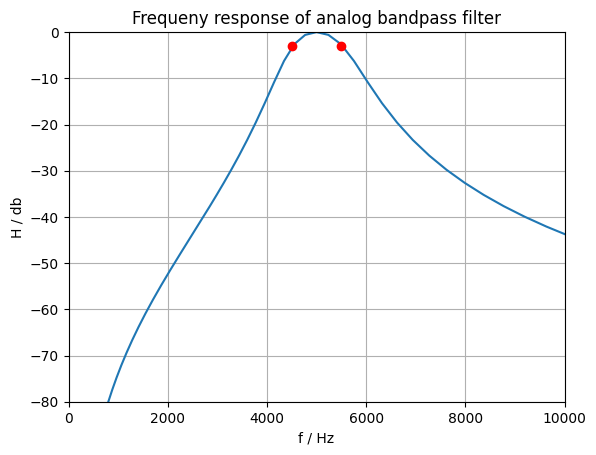

In [12]:
# ananlog bandpass (bessel) with TI tool

import pandas as pd

df = pd.read_csv("analog_bandpass.csv")

plt.title("Frequeny response of analog bandpass filter")
plt.plot(df["Frequency"], df["Magnitude Response@Bessel 6th order"])
plt.plot(4500, -3, 'ro')
plt.plot(5500, -3, 'ro')
plt.grid()
plt.xlabel("f / Hz")
plt.ylabel("H / db")
plt.xlim(0, 10000)
plt.ylim(-80, 0)
plt.show()